# IPL Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_data = pd.read_csv("C:/Users/waris/Downloads/IPL Data Analysis/IPL Matches 2008-2020.csv")
ball_data = pd.read_csv("C:/Users/waris/Downloads/IPL Data Analysis/IPL Ball-by-Ball 2008-2020.csv")

In [3]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


To Check if there is any missing data

In [5]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

To Check the shape of the Data
(Shape Attribute)

In [7]:
match_data.shape # 816 rows and 17 columns

(816, 17)

In [8]:
ball_data.shape # 193468 rows and 18 columns

(193468, 18)

To Check the Columns Name (Columns Attribute)

In [9]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

Matches Played So Far

In [11]:
print('Matches Played So Far: ', match_data.shape[0]) # returns the number of rows
print('\n Cities: ', match_data['city'].unique()) # unique cities in which matches were played
print('\n Teams: ', match_data['team1'].unique()) # total teams that participated

Matches Played So Far:  816

 Cities:  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [12]:
match_data['season'] = pd.DatetimeIndex(match_data['date']).year # extracted year from date and added new Season Column
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


No. of matches played per season

In [13]:
match_per_season = match_data.groupby('season')['id'].count().reset_index().rename(columns = {'id':'matches'})
match_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


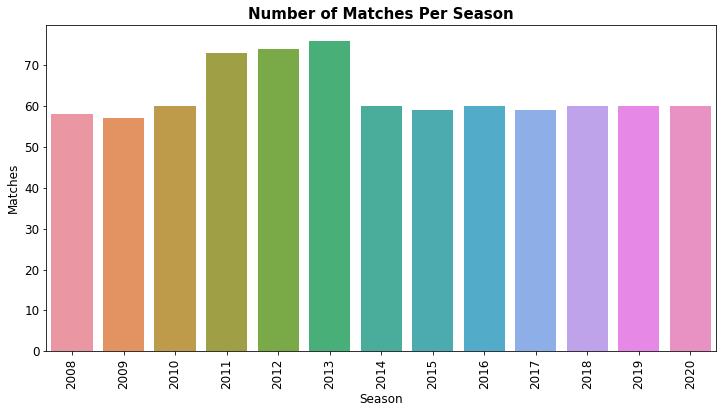

In [14]:
plt.figure(figsize=(12,6)) # should always be used before sns
sns.countplot(x=match_data['season'])
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Matches', fontsize=12)
plt.title('Number of Matches Per Season', fontsize=15, fontweight = 'bold')
plt.show()

In [15]:
season_data = match_data[['id','season']].merge(ball_data, left_on='id', right_on='id', how='left').drop('id', axis=1)
season_data.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


Total Runs Scored in Each Season

In [16]:
season = season_data.groupby(['season'])['total_runs'].sum().reset_index().set_index('season')
season

,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


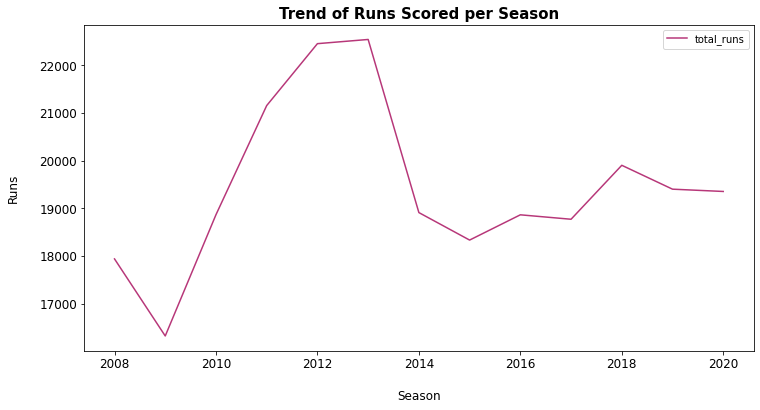

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=season, palette='magma')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nSeason',fontsize=12)
plt.ylabel('Runs\n', fontsize=12)
plt.title('Trend of Runs Scored per Season', fontweight='bold', fontsize=15)
plt.show()

Average Runs Per Match in Each Season

In [18]:
runs_per_season = pd.concat([match_per_season.set_index('season'),season.iloc[:]], axis=1)
runs_per_season['runs_per_match'] = runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season

,matches,total_runs,runs_per_match
season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


Toss Winners

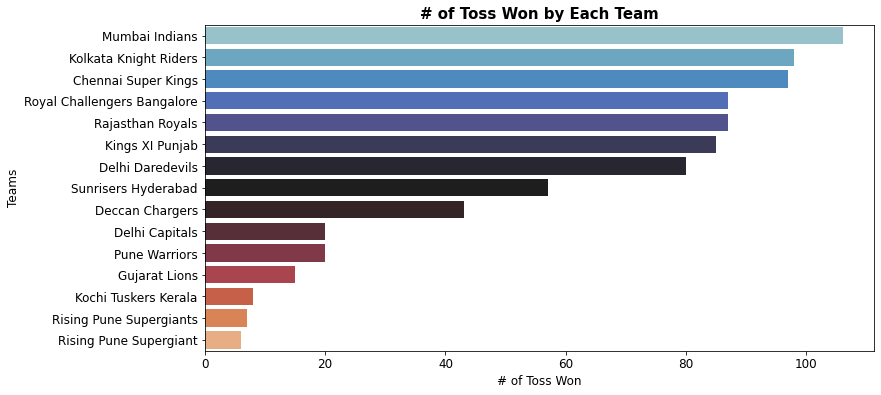

In [19]:
toss = match_data['toss_winner'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(y=toss.index, x=toss, palette= 'icefire')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Teams', fontsize=12)
plt.xlabel('# of Toss Won', fontsize=12)
plt.title("# of Toss Won by Each Team", fontsize=15, fontweight='bold')
plt.show()

Toss Decision

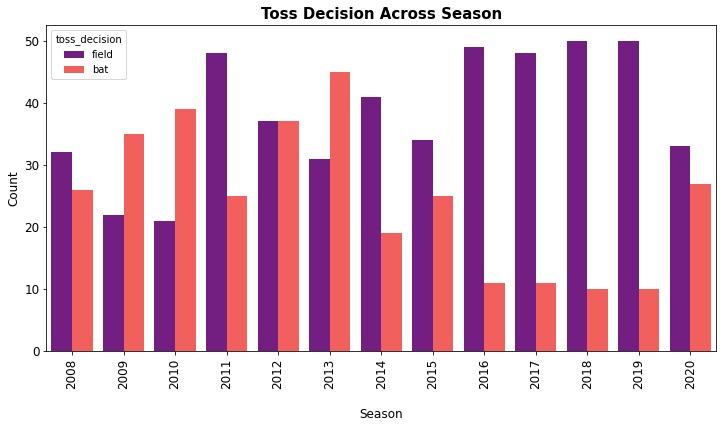

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=match_data, palette='magma', saturation=1)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nSeason', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Toss Decision Across Season', fontsize=15, fontweight='bold')
plt.show()

Match Results

In [21]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [22]:
match_data['result'].value_counts()
# wickets (Team Fielding first Won the Match)
# runs (Team Batting first Won the Match)
# tie (No. of Ties)

wickets    435
runs       364
tie         13
Name: result, dtype: int64

Best Stadium for Batting First

In [23]:
match_data.venue[match_data.result=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

Best Stadium for Fielding First


In [24]:
match_data.venue[match_data.result=='wickets'].mode()

0    Eden Gardens
dtype: object

Best Stadium for Teams to Win the Match if they Win the Toss

In [25]:
match_data.venue[match_data.toss_winner=='Delhi Daredevils'][match_data.winner=='Delhi Daredevils'].mode()

0    Feroz Shah Kotla
dtype: object

Does Winning the Toss Affects Match Result?

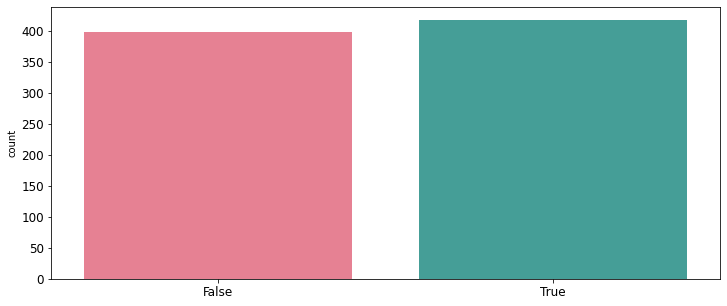

In [26]:
toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(12,5))
sns.countplot(x = toss, palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

How Toss Decision affect the Match Result?

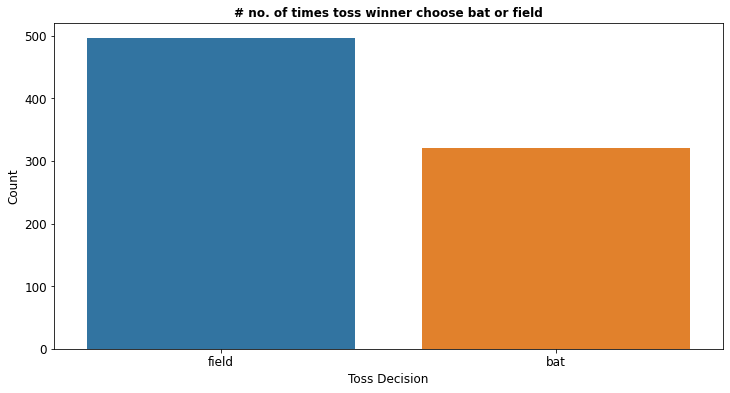

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x = match_data.toss_decision)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('# no. of times toss winner choose bat or field', fontsize=12, fontweight='bold')
plt.show()

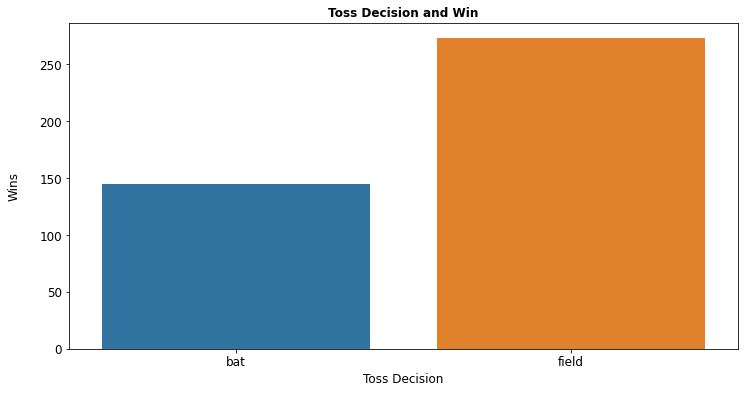

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x= match_data.toss_decision[match_data.toss_winner == match_data.winner])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Wins\n', fontsize= 12)
plt.xlabel('Toss Decision', fontsize=12)
plt.title('Toss Decision and Win', fontsize=12, fontweight='bold')
plt.show()

Batsman Analysis

In [29]:
player = ball_data['batsman'] == 'SK Raina'
df_player = ball_data[player]
df_player.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


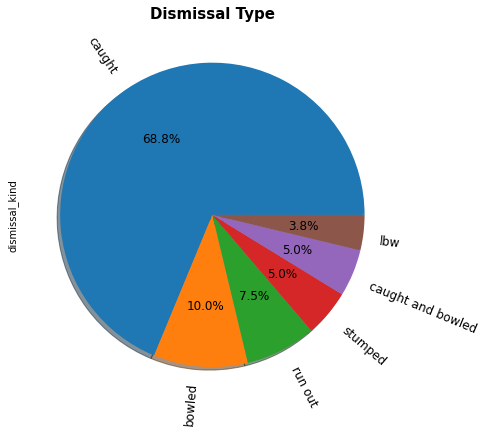

In [30]:
plt.figure(figsize= (14,7))
df_player['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow= True, rotatelabels= True, fontsize=12)
plt.title('Dismissal Type', fontsize=15, fontweight='bold')
plt.show()

In [41]:
def count(df_player, runs):
    return len(df_player[df_player['batsman_runs'] == runs])*runs
# Number of runs scored in 1's, 2's, 3's, 4's & 6's

In [43]:
print("Runs Scored from 1's:", count(df_player, 1))
print("Runs Scored from 2's:", count(df_player, 2))
print("Runs Scored from 3's:", count(df_player, 3))
print("Runs Scored from 4's:", count(df_player, 4))
print("Runs Scored from 6's:", count(df_player, 6))

Runs Scored from 1's: 1666
Runs Scored from 2's: 528
Runs Scored from 3's: 33
Runs Scored from 4's: 1972
Runs Scored from 6's: 1164


Top 10 Batsman in Terms of Highest Runs

In [61]:
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman', 'Runs']
top10 = runs.sort_values(by= 'Runs', ascending=False).reset_index().drop('index', 1).head(10)
top10

,Batsman,Runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


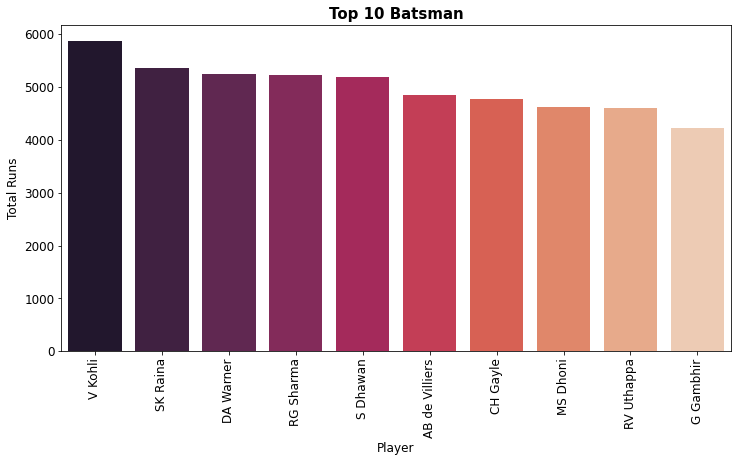

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(x= top10['Batsman'], y= top10['Runs'], palette= 'rocket')
plt.xticks(rotation=90, fontsize= 12)
plt.yticks(fontsize=12)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.title('Top 10 Batsman', fontsize=15, fontweight='bold')
plt.show()